In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

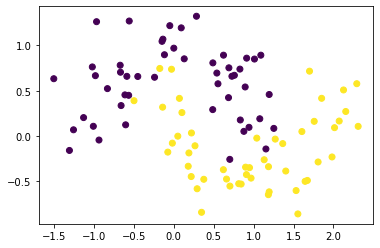

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)

In [10]:
model1.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [11]:
history1= model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

3888/3888 [==============================] - 2s 421us/step


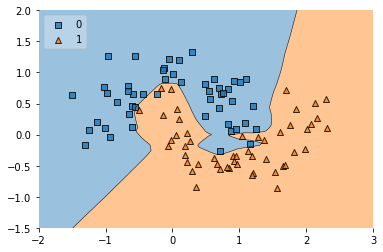

In [17]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

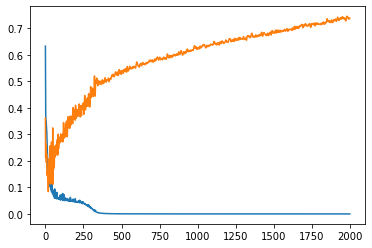

In [18]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])

##  Create with requlatization

In [19]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [20]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

3888/3888 [==============================] - 2s 492us/step


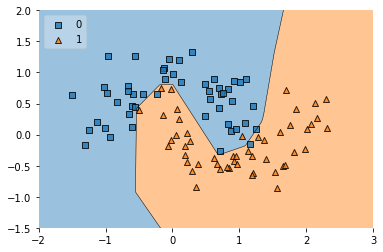

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

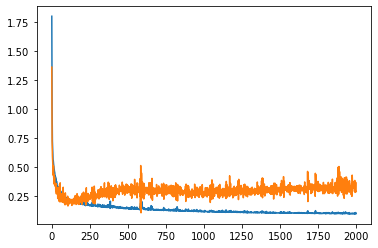

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [23]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

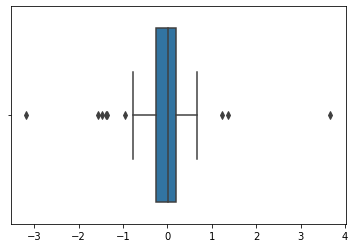

In [24]:
sns.boxplot(model1_weight_layer1)

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

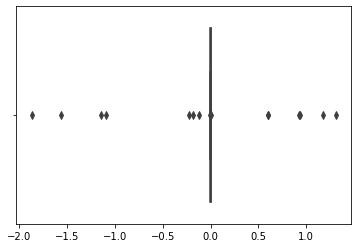

In [25]:
sns.boxplot(model2_weight_layer1)

In [26]:
model1_weight_layer1.min()

-3.1860292

In [27]:
model2_weight_layer1.min()

-1.8719332

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Smit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

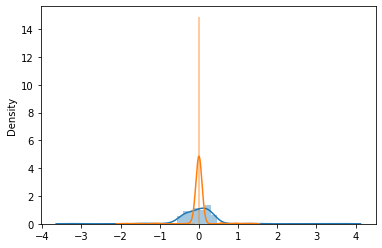

In [28]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [29]:
model1.get_weights()[0].reshape(256)

array([-2.13146448e-01, -3.70923012e-01, -1.43694922e-01,  1.56998225e-02,
        3.17597896e-01, -4.04957741e-01,  3.25312406e-01,  2.44384319e-01,
        1.15136735e-01,  1.91966724e-02,  3.29687059e-01,  2.03326449e-01,
       -4.07859266e-01, -2.50081509e-01,  2.86553870e-03,  1.92987069e-01,
       -9.18517262e-02,  2.63146549e-01, -1.01598002e-01,  3.02558523e-02,
        3.79522175e-01, -5.73519170e-02,  5.09231269e-01, -3.95712405e-01,
       -3.87019932e-01, -3.66876185e-01, -2.37069383e-01, -4.47684139e-01,
        2.97705024e-01, -3.49302024e-01,  4.42757122e-02,  4.23661768e-01,
        2.25353062e-01,  2.02711657e-01,  2.93226957e-01, -4.81422305e-01,
       -3.01256105e-02, -5.22217929e-01,  3.33753526e-01, -5.32503247e-01,
       -1.93634167e-01, -1.93995565e-01, -4.74581838e-01, -9.43055283e-03,
        1.79374561e-01, -4.04883027e-01,  1.54701486e-01,  4.23501104e-01,
       -1.76412910e-01, -2.12459370e-01, -2.87634909e-01,  3.92466364e-03,
       -4.32387620e-01,  